# Représentation temps-fréquence

In [1]:
from myst_nb import glue
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft

Les transformations de Fourier font ressortir le contenu fréquentiel
mais elles ne permettent pas facilement de localiser temporellement certains évènements qui surviennent dans le signal,
comme des changements brusques ou des modification de fréquence.

La {numref}`F:temps-frequence:deux-sinus` représente deux signaux et leur spectres respectifs.
Ces deux signaux ont en commun le fait qu'ils sont constitués de deux sinusoïdes de fréquence 50 Hz et 100 Hz,
la différence étant l'ordre des deux sinusoïdes.
À partir des spectres seuls, il n'est pas possible de comprendre clairement ce que sont les signaux temporels.
À partir du module seul, on comprend que les signaux temporels sont constitués de deux sinusoïdes de 50 Hz et 100 Hz,
mais la phase n'est pas interprétable.

```{glue:figure} G:temps-frequence:deux-sinus
:name: "F:temps-frequence:deux-sinus"

Spectres de deux signaux constitués de sinusoïdes de fréquence 50 Hz et 100 Hz.
```

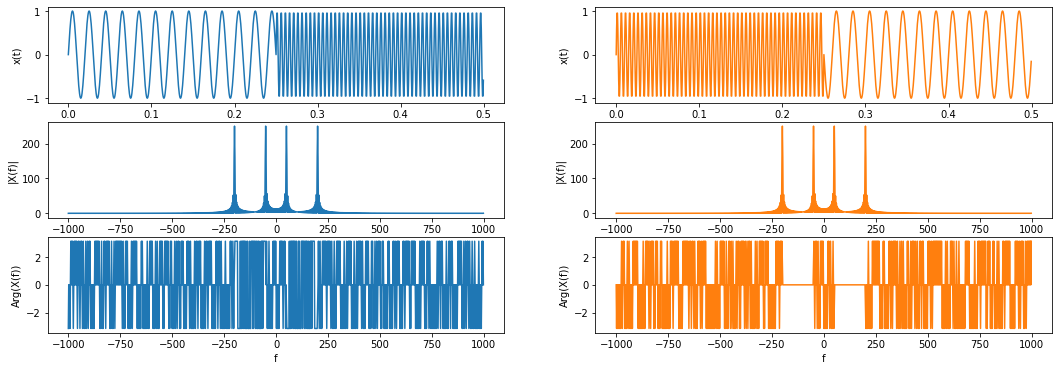

In [14]:
N = 1000
n = np.arange(N)
fe = 2e3
Te = 1/fe
t = n*Te
k = np.arange(N) - N/2
f = k*fe/N
f1, f2 = 50, 200

# Signaux
signals = [
    np.where( n<N/2, np.sin(2*np.pi*f1*t), np.sin(2*np.pi*f2*t) ),
    np.where( n<N/2, np.sin(2*np.pi*f2*t), np.sin(2*np.pi*f1*t) )
]
colors = [ "tab:blue", "tab:orange" ]

i = 0
fig = plt.figure(figsize=(18,6))
for x in signals:
    
    i += 1
    
    # Transformée de Fourier (partie positive seulement)
    X = fft.fftshift(fft.fft(x))
    
    # Affichage
    plt.subplot(3,2,i)
    plt.plot(t, x, colors[i-1])
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.subplot(3,2,2+i)
    plt.plot(f, np.abs(X), colors[i-1])
    plt.xlabel("f")
    plt.ylabel("|X(f)|")
    plt.subplot(3,2,4+i)
    plt.plot(f, np.angle(X), colors[i-1])
    plt.xlabel("f")
    plt.ylabel("Arg(X(f))")

glue("G:temps-frequence:deux-sinus", fig, display=False)

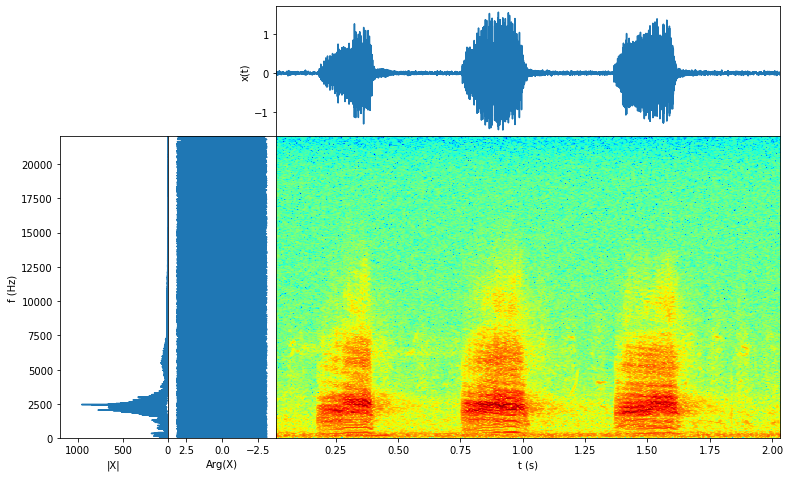

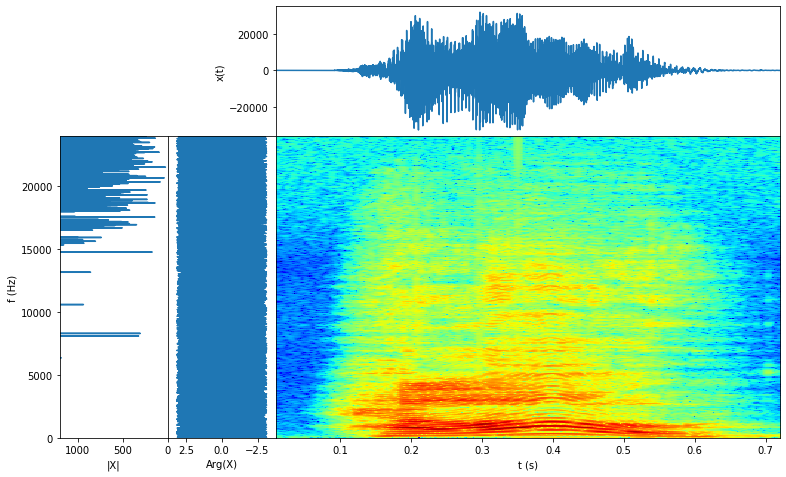

In [5]:
from scipy.io import wavfile
from IPython.display import Audio, Markdown, display


def tfplot(x, fe):
    
    N = len(x)
    n = np.arange(N)
    Te = 1/fe
    t = n*Te
    k = np.arange(N/2)
    f = k*fe/N

    
    X = fft.fftshift(fft.fft(x))
    X = X[int(N/2):]

    fig = plt.figure(figsize=(10,6))

    ax1 = plt.subplot(2,3,3)
    ax1.set_position([0.3, 0.7, 0.7, 0.3])
    plt.plot(t, x)
    plt.xlim([t[0], t[-1]])
    plt.ylabel("x(t)")

    ax2 = plt.subplot(2,3,4)
    ax2.set_position([0, 0, 0.15, 0.7])
    plt.plot(np.abs(X), f)
    plt.ylim([0, fe/2])
    ax2.set_xlim(1.2e3, 0)
    plt.xlabel("|X|")
    plt.ylabel("f (Hz)")

    ax3 = plt.subplot(2,3,5)
    ax3.set_position([0.15, 0, 0.15, 0.7])
    plt.plot(np.angle(X), f)
    plt.ylim([0, fe/2])
    plt.yticks([])
    ax3.set_xlim(np.pi*1.2, -np.pi*1.2)
    plt.xlabel("Arg(X)")

    ax4 = plt.subplot(2,3,6)
    ax4.set_position([0.3, 0, 0.7, 0.7])
    Pxx, freqs, bins, im = plt.specgram(x, NFFT=1000, Fs=fe, noverlap=900, cmap="jet")
    plt.yticks([])
    plt.xlabel("t (s)")

    plt.show()

fe, x = wavfile.read("_static/files/duck.wav")
x = x/20000
x = x[10000:100000,1]
tfplot(x, fe)

fe, x = wavfile.read("_static/files/hello.wav")
tfplot(x, fe)

In [4]:




# % Représentation temps-fréquence

# clear all;
# close all;

# % Pramètres communs pour les signaux synthétiques
# N = 2000;
# n = 0:N-1;
# fe = 1e3;
# Te = 1/fe;
# t = n*Te;
# k = 0:N/2-1;
# f = k*fe/N;
# W = 256;
# w = hamming(W);
# clim = [];

# % Signaux
# sig = {'rect', 'gauss', 'sin12', 'sin21', 'chirp', 'guitar', 'hello', 'duck'};

# for i = 1:length(sig);
    
#     filename = sig{i};
    
#     % Signal temporel
#     switch filename
            
#         case 'rect'
#             x = (n>.4*N) .* (n<.6*N);
#             x = x .* sin(2*pi*200*t);
            
#         case 'gauss'
#             x = exp(-(n-N/2).^2/2/1000);
#             x = x .* sin(2*pi*200*t);
        
#         case 'sin12'
#             x = sin(2*pi*30*t) .* (n<N/2) + sin(2*pi*100*t) .* (n>=N/2);
            
#         case 'sin21'
#             x = sin(2*pi*100*t) .* (n<N/2) + sin(2*pi*30*t) .* (n>=N/2);
            
#         case 'chirp'
#             f0 = 0;
#             f1 = 100;
#             k = (f1-f0)/t(end);
#             x = sin( 2*pi*f0*t + 2*pi*k*t.^2 );
            
#         case 'guitar'
#             x = audioread('guitar.wav');
#             d = 80;
#             x = x(1:d:end);
#             fe = 192000/d;
#             N = floor(length(x)/2)*2;
#             x = x(1:N);
# %             sound(x,fe);
#             n = 0:N-1;
#             Te = 1/fe;
#             t = n*Te;
#             k = 0:N/2-1;
#             f = k*fe/N;
#             clim = [0 10];
            
#         case 'hello'
#             x = audioread('hello.wav');
#             d = 1;
#             x = x(1:d:end,1);
#             fe = 44100/d;
#             N = floor(length(x)/2)*2;
#             x = x(1:N);
# %             sound(x,fe);
#             n = 0:N-1;
#             Te = 1/fe;
#             t = n*Te;
#             k = 0:N/2-1;
#             f = k*fe/N;
#             clim = [0 5];
            
#         case 'duck'
#             x = audioread('duck.wav');
#             d = 1;
#             x = x(10000:d:100000,1);
#             fe = 44100/d;
#             N = floor(length(x)/2)*2;
#             x = x(1:N);
# %             sound(x,fe);
#             n = 0:N-1;
#             Te = 1/fe;
#             t = n*Te;
#             k = 0:N/2-1;
#             f = k*fe/N;
#             clim = [0 5];
            
#     end;
    
#     % Transformée de Fourier (partie positive seulement)
#     X = fftshift(fft(x));
#     X = X(N/2+1:N);
    
#     % Spectrogramme
#     s = spectrogram(x,w,250,W,fe);
    
#     % Affichage
#     xx = 0.2;
#     yy = 0.75;
#     dx = 0.1;
#     dy = 0.05;
#     figure('Color','white');
#     axes('Position',[xx+dx yy+dy 1-xx-dx-dy 1-yy-2*dy]);
#         plot(t,x);
#         title('Signal temporel','FontWeight','normal');
#         set(gca,'XTick',[]);
#         xlim([0 t(end)]);
#     axes('Position',[dy dx xx-dy yy-dx]);
#         plot(abs(X),f);
#         ylabel('Module du spectre');
#         set(gca,'XDir','Reverse');
#         set(gca,'YTick',[]);
#     axes('Position',[xx+dx dx 1-xx-dx-dy yy-dx]);
#         if numel(clim)==0,
#             imagesc(t,(0:N/2-1)*fe/N,abs(s).^2)
#         else
#             imagesc(t,(0:N/2-1)*fe/N,abs(s).^2,clim)
#         end;
#         axis xy; colormap(jet);
#         xlabel('Temps (s)');
#         ylabel('Fréquence (Hz)');
        
#     % Enregistrement en PNG de l'image couleur (pour la projection)
#     export_fig([filename '.png'],'-nocrop','-m2','-nofontswap');
    
# %     % Enregistrement en EPS de l'image à niveaux de gris (pour le support)
# %     colormap(repmat(linspace(1,0,100)',1,3));
# %     export_fig([filename '-eps.png'],'-nocrop','-m2','-nofontswap');
# %     system(['convert ' filename '-eps.png ' filename '.eps']);
# %     system(['rm ' filename '-eps.png']);
    
# end;


# % % Chirp
# % N = 2000;
# % n = 0:N-1;
# % fe = 1e3;
# % Te = 1/fe;
# % t = n*Te;
# % 
# % f0 = 0;
# % f1 = 50;
# % k = (f1-f0)/t(end);
# % x = sin( 2*pi*f0*t + 2*pi*k*t.^2 );
# % figure;
# % plot(t,x);
# % xlabel('Temps (s)');
# % ylabel('x(t)');
# % 
# % X = fftshift(fft(x));
# % k = (0:N-1) - floor(N/2);
# % figure;
# % plot(k*fe/N,abs(X));
# % xlabel('Fréquence (Hz)');
# % ylabel('|X(f)|');
# % 
# % % Fenêtre
# % W = 256;
# % w = hamming(W);
# % [s,f,t,p] = spectrogram(x,w,250,W,fe);
# % figure;
# % imagesc(p)
# % axis xy; axis tight; colormap(jet);
# % xlabel('Temps (s)');
# % ylabel('Fréquence (Hz)');
# % 


FileNotFoundError: [Errno 2] No such file or directory: 'duck.wav'